# GENETIC ALGORITHM
### Code for education
### by admin Leonardo da Vinci

# 1) Libraries
โค้ดนี้จะเขียน genetic algorithm from scratch จริง ๆ  
จะใช้เพียงไลบรารี numpy สำหรับสร้างอาร์เรย์เก็บข้อมูลของประชากรกับคำนวณ  
และอีกไลบรารีหนึ่งคือ matplotlib เอาไว้พล็อตกราฟ

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 2) Fitness function

หมายถึงฟังก์ชันที่ต้องการหาว่าค่าต่ำสุดหรือสูงสุดอยู่ที่ไหน  
ตรงส่วนนี้อยากให้เป็นฟังก์ชันอะไรก็สามารถเปลี่ยนแปลงได้ตามใจชอบ

In [2]:
def func(x):
    return (x-1)**2

def parabola_sinusoidal(x) :
    return 0.1*(x-5)**2 - 5*np.cos(1.5*(x-5)) + 5
    
def ackley(x) :
    return -20*np.exp(-0.2*np.abs(x-5)) - np.exp(np.cos(1.5707*(x-5))) + 22.718

# 3) Genetic Algorithm

## อธิบายอาร์กิวเมนต์ที่ใส่ในฟังก์ชันแต่ละตัว
- fitness_fn     : fitness function  
- n_generation   : จำนวน generation (จำนวนรุ่น)  
- n_population   : จำนวนประชากร  
- crossover_rate : อัตราการเกิดครอสโอเวอร์ (ใส่ค่าระหว่าง 0 ถึง 1)    
- mutation_rate  : อัตราการกลายพันธุ์ (ใส่ค่าระหว่าง 0 ถึง 1)    
- elitist        : อัตราส่วนชนชั้นสูง (ใส่ค่าระหว่าง 0 ถึง 1)  
- extinction     : อัตราการส่วนที่สูญพันธุ์ (ใส่ค่าระหว่าง 0 ถึง 1)

In [3]:
def evolve(fitness_fn,
           n_generation = 100, n_population = 100,
           crossover_rate = 0.5, mutation_rate = 0.01,
           elitist = 0.1, extinction = 0.5) :
    
    # Initialize
    n_elitist   = int(elitist*n_population)
    n_survive   = n_population - int(extinction*n_population)
    bin2dec = np.float_power(2, np.arange(-17, -17+31))  # ตัวแปรนี้ เอาไว้แปลงจากฐาน 2 เป็นฐาน 10
    
    # Create population
    parents = np.random.randint(0, 2, (n_population, 32))
    x = (parents[:,0]*2-1)*np.sum(bin2dec*parents[:, 1:], axis=1)
    fitness = fitness_fn(x)
    sorted_idx = np.argsort(fitness)
    parents = parents[sorted_idx]
    offspring = np.empty_like(parents)
    
    fitness_hist = [fitness[sorted_idx[0]]]
    
    for gen in range(n_generation) :
        # crossover
        offspring[:n_elitist] = parents[:n_elitist]
        
        for i in range(n_elitist, n_survive) :
            j = np.random.randint(0, n_survive)
            while i == j :
                j = np.random.randint(0, n_survive)
            
            cross = np.random.rand(32) < crossover_rate
            offspring[i, :] = (1-cross)*parents[i, :] + cross*parents[j, :]
            if j>n_elitist :
                offspring[j, :] = cross*parents[i, :] + (1-cross)*parents[j, :]
            
        for i in range(n_survive, n_population) :
            [j1, j2] = np.random.choice(n_survive, 2, replace=False)
            offspring[i, :] = (1-cross)*parents[j1, :] + cross*parents[j2, :]
        
        # mutation
        mutate = np.random.uniform(0, 1, (n_population-n_elitist, 32)) < mutation_rate
        offspring[n_elitist:] = np.logical_xor(offspring[n_elitist:], mutate).astype(np.int)
        
        # decoding and sort by fitness
        x = (offspring[:,0]*2-1)*np.sum(bin2dec*offspring[:, 1:], axis=1)
        fitness = fitness_fn(x)
        sorted_idx = np.argsort(fitness)
        parents = offspring[sorted_idx]
        fitness_hist.append(fitness[sorted_idx[0]])
    
    plt.figure()
    plt.plot(fitness_hist)
    plt.title('History of fitness value')
    plt.xlabel('# generation')
    plt.ylabel('the best fitness value')
    plt.show()
    print('best chromosome : ', x[sorted_idx[0]])
    print('best fitness    : ', fitness[sorted_idx[0]])
    
    return x[sorted_idx[0]]

def graph_plotting(fn, xlim, ylim=None, npoints=100):
    x = np.linspace(xlim[0], xlim[1], npoints)
    y = fn(x)
    
    plt.figure()
    plt.plot(x, y, '-k')
    plt.xlim(xlim)
    if ylim != None : plt.ylim(ylim)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Graph')
    
    plt.show()

### Note :
- โค้ดนี้แอดเขียนขึ้นเพื่อการศึกษา จึงเขียนให้เข้าใจง่ายไม่เน้นการคำนวณไว ก็เลยไม่ได้ optimize โค้ดในหลาย ๆ ส่วน ซึ่งสามารถนำไปพัฒนาดัดแปลงได้ต่อ อย่างเช่น ลดหน่วยความจำที่ต้องใช้ลงโดยประกาศเป็นตัวแปร int แทนการใช้อาร์เรย์ที่มีแต่เลข 0 กับ 1 แล้วใช้ bitwise operator ในการ crossover หรือ mutation ฯลฯ แล้วแอดก็ไม่ได้ทำตัวเช็คไว้ด้วย เช่น ถ้าผู้ใช้ใส่ค่าไม่ถูกอย่างเช่นใส่พวกอัตราส่วนทั้งหลายเกิน 1 ก็จะทำให้มี error เกิดขึ้นได้
- ไม่จำกัดว่ายีนจะต้องมีค่าได้แค่ 0 กับ 1 จะเป็นตั้งแต่ 0 ถึง 9 ก็ได้ จะให้เป็น string ตัวอักษร a ถึง z ก็ยังได้ ขึ้นอยู่กับว่าจะเอาไปใช้กับงานอะไร
- จำนวนยีนในโครโมโซม แอดกำหนดตายตัวไปเลยว่าให้เท่ากับ 32 ถ้าอยากเปลี่ยนก็ลองเขียนใหม่หรือดัดแปลงโค้ดกันดูนะครับ

# 4) ส่วน main function

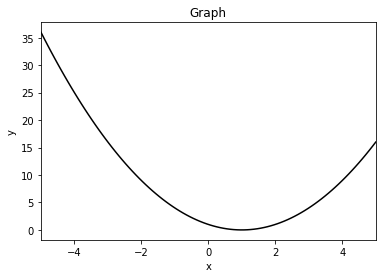

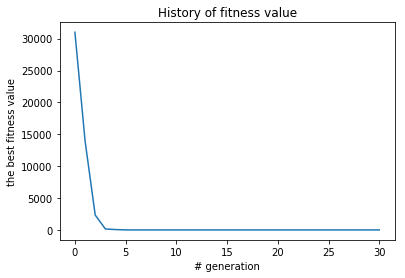

best chromosome :  0.9999923706054688
best fitness    :  5.820766091346741e-11


In [4]:
# Parabola
graph_plotting(func, (-5, 5))
x = evolve(func, n_generation = 30, n_population = 100,
               crossover_rate = 0.5, mutation_rate = 0.01,
               elitist = 0.1, extinction = 0.5)

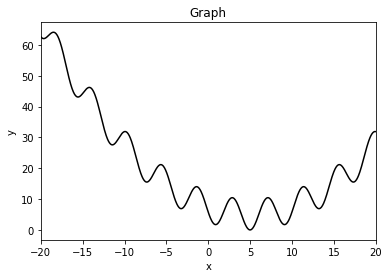

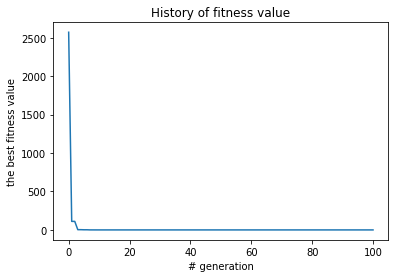

best chromosome :  5.0
best fitness    :  0.0


In [5]:
# Combination of a parabola and sinusoidal wave
graph_plotting(parabola_sinusoidal, (-20, 20), npoints=1000)
x = evolve(parabola_sinusoidal, 
            n_generation = 100, n_population = 200,
            crossover_rate = 0.5, mutation_rate = 0.05,
            elitist = 0.1, extinction = 0.5)

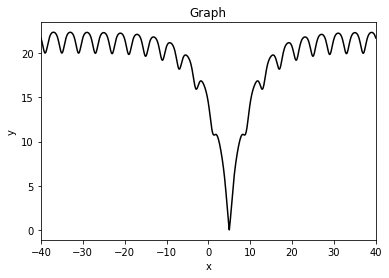

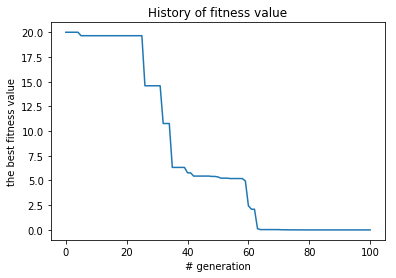

best chromosome :  5.0
best fitness    :  -0.00028182845904467513


In [6]:
# Ackley function
graph_plotting(ackley, (-40, 40), npoints=1000)
x = evolve(ackley, 
        n_generation = 100, n_population = 100,
        crossover_rate = 0.5, mutation_rate = 0.01,
        elitist = 0.1, extinction = 0.5)

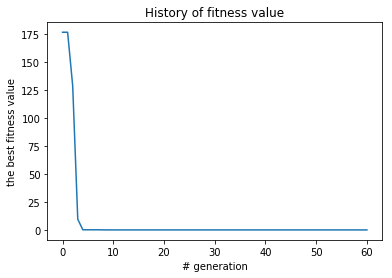

best chromosome :  5.0
best fitness    :  0.0


In [7]:
# fitness function จะใส่พารามิเตอร์เป็น lambda expression ก็ได้
x = evolve(lambda x: x*(x-10)+25,
        n_generation = 60, n_population = 100,
        crossover_rate = 0.5, mutation_rate = 0.01,
        elitist = 0.1, extinction = 0.5)